In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd gdrive

/content/gdrive


In [ ]:
%cd ..

/content


In [ ]:
!git clone 'https://github.com/st1800eafit/st1800-231.git'


Cloning into 'st1800-231'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 127 (delta 13), reused 36 (delta 9), pack-reused 82
Receiving objects: 100% (127/127), 88.34 MiB | 30.33 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (86/86), done.


In [ ]:
path_in="gdrive/MyDrive/st1800-231/datasets/trabajo2/"
path_out="gdrive/MyDrive/st1800-231/"
filename='twitterClimateData.csv.zip'

In [ ]:
!pip install nltk
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
from zipfile import ZipFile
import codecs
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer

In [ ]:
zip_file = ZipFile(path_in+filename)
df = pd.read_csv(zip_file.open('twitterClimateData.csv'),delimiter=';')
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


# Tokenización

In [ ]:
df2 = df[['text']]
df2.head()

,text
0,"2020 is the year we #votethemout, the year we ..."
1,Winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...
3,"A year of resistance, as youth protests shaped..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...


In [ ]:
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df2['tokenized_text'] = df2.apply(lambda row: nltk.word_tokenize(str(row['text'])), axis=1)

<ipython-input-48-6c848f59dad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tokenized_text'] = df2.apply(lambda row: nltk.word_tokenize(str(row['text'])), axis=1)


In [ ]:
df2.head()

,text,tokenized_text
0,"2020 is the year we #votethemout, the year we ...","[2020, is, the, year, we, #, votethemout, ,, t..."
1,Winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[WEEK, 55, of, #, ClimateStrike, at, the, @, U..."
3,"A year of resistance, as youth protests shaped...","[A, year, of, resistance, ,, as, youth, protes..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[HAPPY, HOLIDAYS, #, greta, #, gretathunberg, ..."


In [ ]:
# Tokenize todo el contenido
all_tokens_text = []
for t in df2['tokenized_text']:
    all_tokens_text.extend(t)

In [ ]:
new_list = all_tokens_text[:10]
print(new_list)

['2020', 'is', 'the', 'year', 'we', '#', 'votethemout', ',', 'the', 'year']


In [ ]:
# analisis de frecuencia en palabras de 'text'
fdist_text = nltk.FreqDist(all_tokens_text)
print('Size BoW_text=',len(fdist_text))
topwordstext = fdist_text.most_common(20)
print(topwordstext)

Size BoW_text= 116979
[('#', 290806), ('.', 63138), ('@', 61731), ('the', 53626), (',', 41414), ('to', 40665), ('of', 26667), ('and', 26352), ('!', 25286), (':', 21605), ('in', 21573), ('a', 21532), ('is', 19153), ('for', 18341), ('ClimateStrike', 17636), ('’', 17025), ('?', 16845), ('at', 16598), ('on', 13737), ('ClimateChange', 13325)]


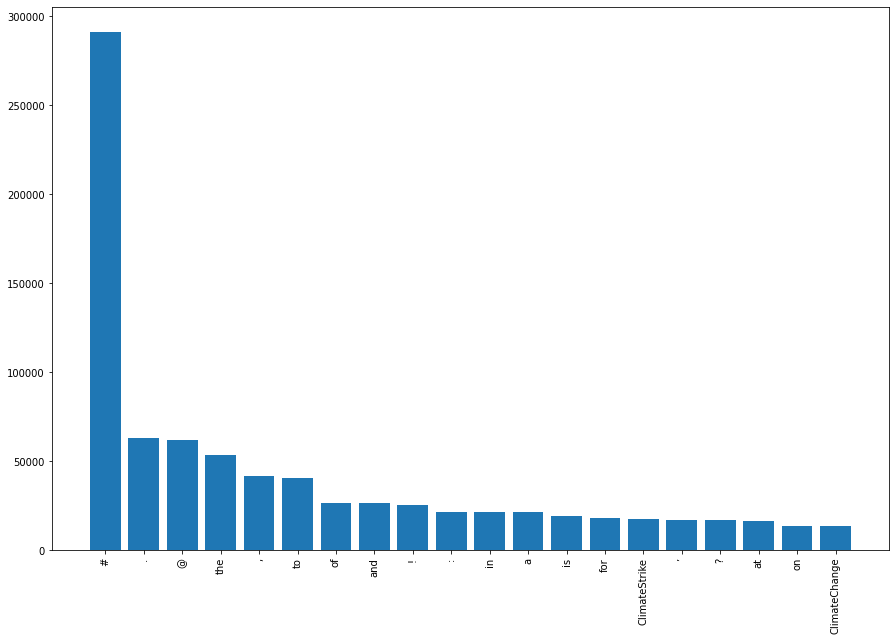

In [ ]:
x,y = zip(*topwordstext)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# stopwords en nltk
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'mustn', 'will', 'mightn', 'themselves', "she's", "mightn't", 'above', 'any', 'there', 'to', 'when', 'now', 'this', 'did', 'own', 'do', 's', 'that', 'didn', 'more', 'between', 'your', 'again', "isn't", 'but', 'a', 'should', 'hadn', 'an', 'of', 'so', 'against', 'those', 'ourselves', "hadn't", 'are', 'his', 'can', 'until', 'here', 'theirs', "that'll", 'their', 'because', 'such', 'wouldn', 'shouldn', 'into', 'then', 'out', 'ours', 'am', "you'll", "wouldn't", 'isn', 'while', 'over', 'in', 've', "it's", 'itself', 'only', 'under', 'ma', 'won', "you'd", 'as', 'm', 'hers', 'during', 'who', 'after', 'them', "you're", 'having', 'does', 'nor', 'the', 'at', 'll', 'for', 'by', "didn't", 't', 'don', 'o', 'most', 'y', 'wasn', 'other', 'we', 'himself', 'if', 'too', 'couldn', 'how', 'than', 'she', "haven't", 'being', 'no', 'or', 'through', 'my', 'both', 'weren', 'me', "wasn't", 'have', 'he', 'which', 'haven', 'off', "won't", 'has', 'hasn', 're', 'were', 'before', 'about', 'from', 'needn', 'its', '

Size of new BoW title = 94334


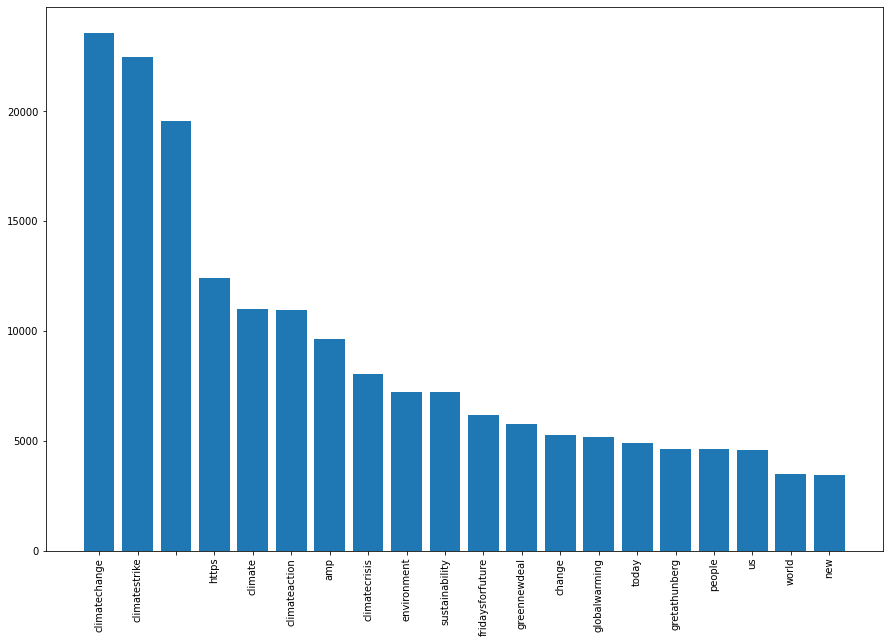

In [ ]:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

# ya tokenizado en all_tokens_title o all_tokens_content
tokens = [w.lower() for w in all_tokens_text if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Size of new BoW title = 90807


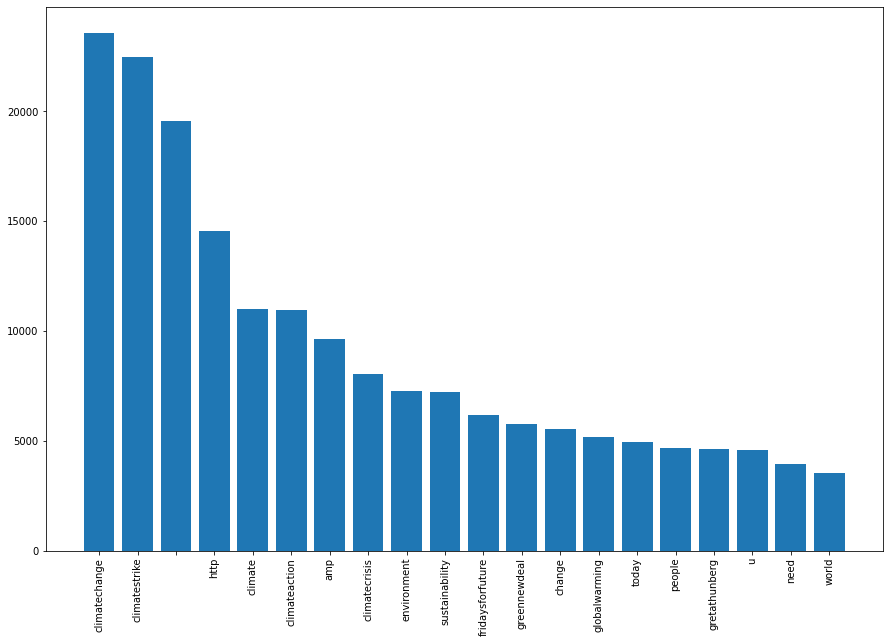

In [ ]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

# Tokenizacion especial para datos Twitter

In [ ]:
dfTweet = df[['text']]

In [ ]:
tk = TweetTokenizer()
dfTweet['tokenized_text'] = dfTweet.apply(lambda row: tk.tokenize(str(row['text'])), axis=1)


<ipython-input-59-1cae50c9dd63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTweet['tokenized_text'] = dfTweet.apply(lambda row: tk.tokenize(str(row['text'])), axis=1)


In [ ]:
dfTweet.head()

,text,tokenized_text
0,"2020 is the year we #votethemout, the year we ...","[2020, is, the, year, we, #votethemout, ,, the..."
1,Winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[WEEK, 55, of, #ClimateStrike, at, the, @UN, ...."
3,"A year of resistance, as youth protests shaped...","[A, year, of, resistance, ,, as, youth, protes..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[HAPPY, HOLIDAYS, #greta, #gretathunberg, #cli..."


In [ ]:
# Tokenize todo el contenido
all_tweet_tokens_text = []
for t in dfTweet['tokenized_text']:
    all_tweet_tokens_text.extend(t)

In [ ]:
# Con este tokenizador se incluyen los # dentro de los tags
tweet_list = all_tweet_tokens_text[:10]
print(tweet_list)

['2020', 'is', 'the', 'year', 'we', '#votethemout', ',', 'the', 'year', 'we']


In [ ]:
# analisis de frecuencia en palabras de los tweets
fTweetdist_text = nltk.FreqDist(all_tweet_tokens_text)
print('Size BoW_text=',len(fTweetdist_text))
topTweetwordstext = fTweetdist_text.most_common(20)
print(topTweetwordstext)

Size BoW_text= 117721
[('.', 64777), ('the', 53666), (',', 41470), ('to', 40697), ('of', 26681), ('and', 26402), ('!', 24805), ('in', 21590), ('a', 21583), ('is', 18991), ('for', 18362), ('#ClimateStrike', 17623), ('’', 17023), ('at', 16606), ('on', 13747), ('#ClimateChange', 13332), ('#climatechange', 9899), ('are', 9653), ('&', 9541), ('#ClimateAction', 9332)]


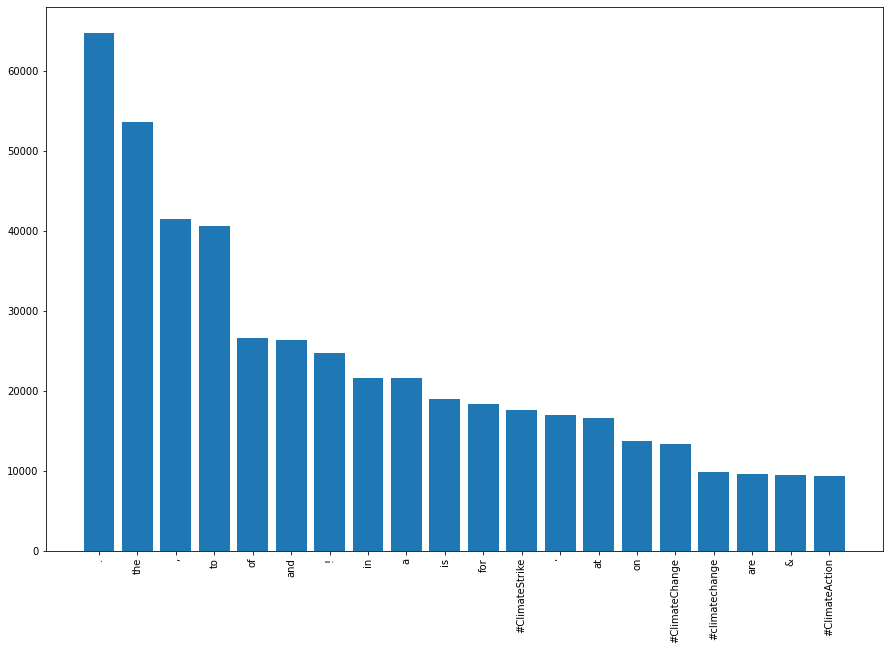

In [ ]:
x,y = zip(*topTweetwordstext)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW Tweet title = 89102


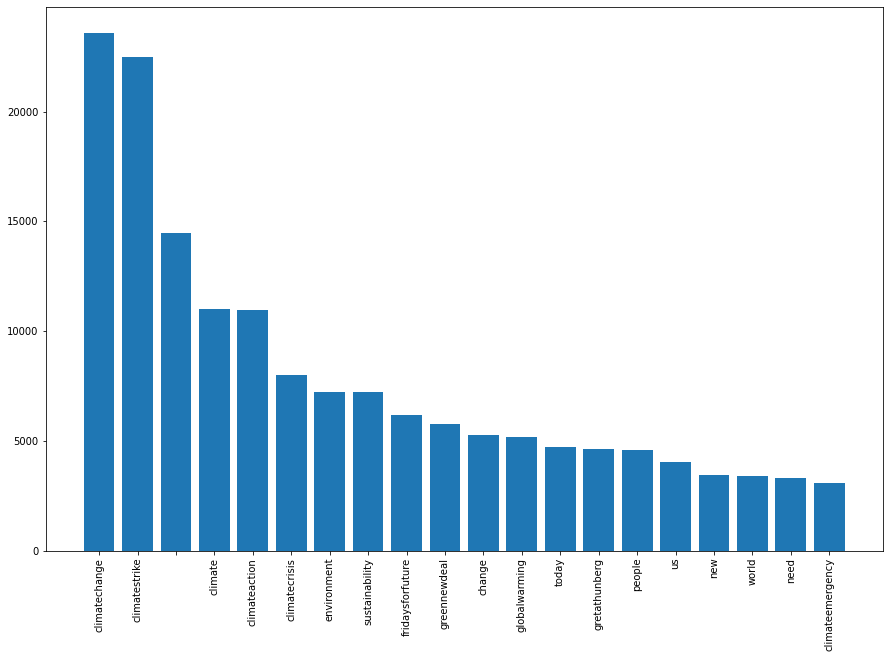

In [ ]:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

# ya tokenizado en all_tokens_title o all_tokens_content
tweetTokens = [w.lower() for w in all_tweet_tokens_text if len(w)>1]
tweetTokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tweetTokens]
tweetTokens = [w for w in tweetTokens if w not in stop_words_nltk]

fdistTweet = nltk.FreqDist(tweetTokens)
topTweetwords = fdistTweet.most_common(20)
print('Size of new BoW Tweet title =',len(fdistTweet))
x,y = zip(*topTweetwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()
#Vemos como el bag of words es menor en este caso

Size of new BoW title = 85406


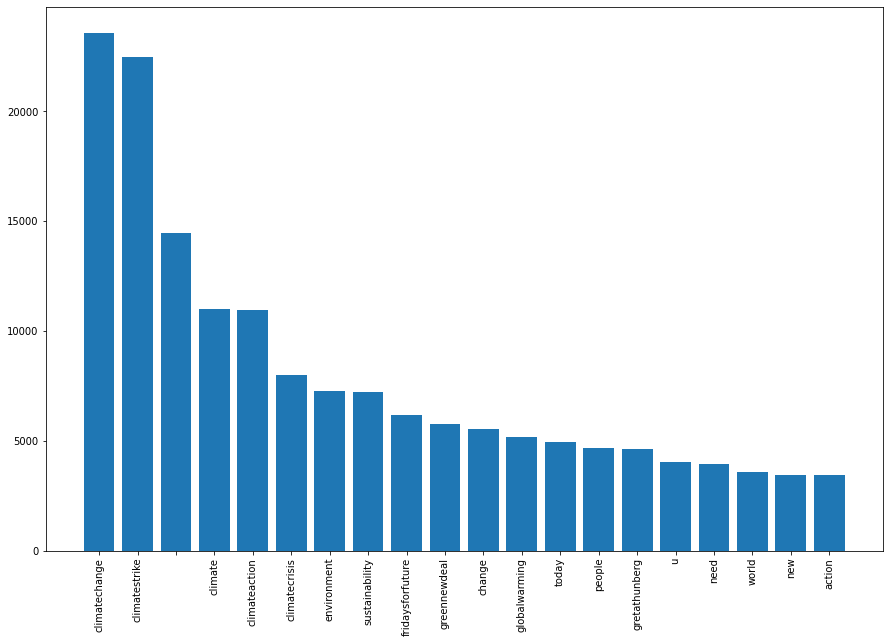

In [ ]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

tweet_wordnet_lemmatizer = WordNetLemmatizer()

#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tweetTokens = [tweet_wordnet_lemmatizer.lemmatize(w) for w in tweetTokens ]

tweet_fdist = nltk.FreqDist(tweetTokens)
topTweetWords = tweet_fdist.most_common(20)
print('Size of new BoW title =',len(tweet_fdist))
x,y = zip(*topTweetWords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()